# Metodo de Monte Carlo acierto y error


**PASO 1**. Genere una secuencia $\{U_j\}_{j=1}^{2N}$ de $2N$ números aleatorios.

In [3]:
from random import random

"""
  Esta funcion genera un par de numeros aleatorios con distribucion uniforme
  con a=0 y b=1
"""
def uniforme():
  return (random(),random())

# Pequeña prueba del codigo

for i in range(10):
  print(uniforme())


(0.10973225398815589, 0.47845759089149364)
(0.6571463229742093, 0.20739813768166093)
(0.8310582542370273, 0.9732525768717)
(0.9846560772817833, 0.39051905982169355)
(0.29017455455108987, 0.3401001409256298)
(0.052665056120875464, 0.7436898284496664)
(0.42785275448809545, 0.03525250528067969)
(0.2540759767999765, 0.17149889717746747)
(0.25977379660839284, 0.1061975866559366)
(0.6068135472285722, 0.5157906740242943)


**PASO 2**. Organice los números aleatorios en $N$ pares $(U_1,U_1^´),(U_2,U_2^´),...,(U_N,U_N^´)$ de cualquier forma tal que cada número aleatorio $U_j$ se use exactamente una vez.

In [42]:
lista = []
N = 5 #por ejemplo
for n in range(N):
  lista.append(uniforme())

print(lista)

[(0.942571766217972, 0.16329932756909915), (0.41928148231975826, 0.30353017867877796), (0.7801614902516041, 0.0005480241893994764), (0.23085338539998368, 0.994763766671869), (0.5992789253592679, 0.1912576792208146)]


**PASO 3**. Calcule $X_i=a+U_i(b-a)\hspace{0.5cm}$ y $\hspace{0.5cm}g(X_i) , \hspace{0.5cm}i=1,2,...,N$

In [49]:
X = lambda a,b,u: a+u[0]*(b-a)

a = 0
b = 1

# pequeña prueba del codigo
for j in lista:
  print(X(a,b,j))

0.942571766217972
0.41928148231975826
0.7801614902516041
0.23085338539998368
0.5992789253592679


A modo de ejemplo se va a utilizar la función $g(x)=-x^2+x$

In [50]:
import numpy as np

g = np.poly1d([-1,1,0])

for j in lista:
  print(X(a,b,j),g(X(a,b,j)))


0.942571766217972 0.054130231746704734
0.41928148231975826 0.2434845209035045
0.7801614902516041 0.17150953938000035
0.23085338539998368 0.17756009984935028
0.5992789253592679 0.2401436949795089


Grafica de la función

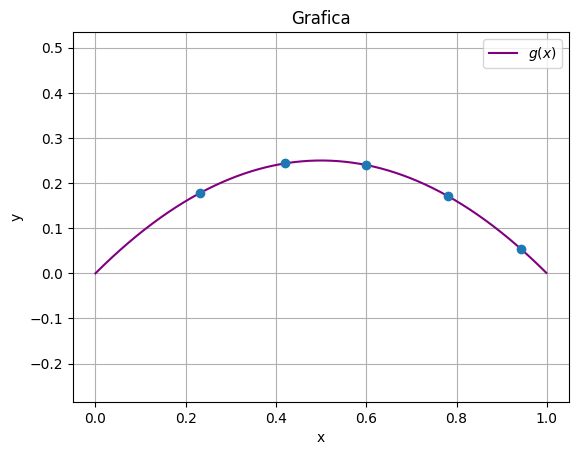

In [51]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()

x = []
for i in lista:
  x.append(i[0])

y = list(map(g ,x))

x1 = np.arange(a,b,0.001)

plt.title('Grafica')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x1,g(x1),color="purple",label="$g(x)$")
plt.plot(x,y,"o")
plt.legend(loc='upper right')
plt.axis('equal')
plt.grid()
plt.show()

**PASO 4**. Cuente el número de casos $N_H$ para los cuales $g(X_i)>cU_i^{'}$

In [54]:
NH = 0
c = 1
for i in lista:
  if g(i[0])>i[1]:
    NH+=1
print(NH)

2


**PASO 5**. Estime la integral $I$ por $\theta_1=c(b-a)\dfrac{N_H}{N}$

In [53]:
I=c*(b-a)*(NH/N)
print(I)

0.4


Use el método de Acierto y Error para estimar las integrales:

$$(a) \int_{0}^{1}e^{e^x}dx$$
$$(b) \int_0^1\sqrt{(1-x^2)^3}dx$$

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

**PASO 10**. Halle el intervalo de confianza de la probabilidad de queaparezcan dos caras lanzando tres veces una moneda
al aire con un nivel de confianza del $95 \%$.